In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import image as image

import easygui

In [2]:
cv2. __version__ #

'4.1.1'

In [22]:
img = cv2.imread('testimages/000033.jpg')
original = img.copy()
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

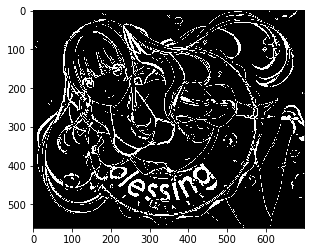

In [23]:
#Use adaptive thresholding
mask = cv2.adaptiveThreshold(imgGray, 
                                   maxValue = 255, 
                                   adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   thresholdType = cv2.THRESH_BINARY, 
                                   blockSize = 25, 
                                   C = 10)

mask = 255 - mask

plt.imshow(mask, cmap='gray')

contours, _ = cv2.findContours(mask, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [ ]:
#Draw the contours
imgContours = img.copy()
imgContours = cv2.drawContours(imgContours, contours, contourIdx=0, color=(255,0,0), thickness=5)

#Get the fitted ellipse
for contour in contours:
    try:
        ellipse = cv2.fitEllipse(contour)
        cv2.ellipse(imgContours, ellipse, color=(0,255,0), thickness=3)
    except:
        pass

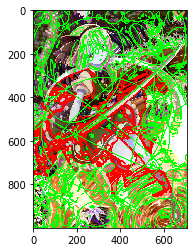

In [21]:
plt.imshow(imgContours)